# **Investigation of Seasonality and Weather on Urban and Rural Pollution**

## Final Programming Project

### *April/May 2021 - Thomas S. Peachey*


## Section 1

Below is the code created for reading in the pollution from  DEFRA and weather data from meteostat.

In [2]:
# Importing the nessecary modules for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re


# Filenames of the raw CSV data
marylebone = "data_files/Marylebone_AirQualityDataHourly_2018-2021_clean.csv"
rochester = "data_files/Rochester_AirQualityDataHourly_2018-2021_clean.csv"
heathrow = "data_files/Weather_data_hourly_Heathrow-Airport.csv"


# A function to read in the data from CSV into a dataframe and format it into a convenient state
def get_data(site):

    # Reading in the air quality data
    df = pd.read_csv(site, skiprows=4, na_values='No data', parse_dates=["Date Time"])
    df.rename(columns={
                        'Hour of Day' : 'Hour',
                        'Day of Week' : 'Day',
                        'PM10 particulate matter (Hourly measured)' : 'PM10',
                        'Status PM10' : 'StatusPM10',
                        'PM2.5 particulate matter (Hourly measured)' :'PM2.5',
                        'Status PM2.5' : 'StatusPM2.5',
                        'Nitrogen dioxide' : 'NO2',	
                        'Status NO2' : 'StatusNO2'
                        }, inplace=True)
    
    # Adding additional indexing columns for the year and month for conveinient iteration
    df["Year"] = df["Date Time"].dt.year
    df["Month"] = df["Date Time"].dt.month

    # Reading in the weather data, removing the duplicate date column and merging the two dataframes together over the relevant time period
    weather = pd.read_csv(heathrow, na_values='No data')
    weather = weather[weather["Date_Hour"]>="2018"].reset_index(drop=True, inplace=False).drop("Date_Hour", axis=1)
    df = pd.merge(df, weather, left_index=True, right_index=True, how='outer')
    
    return df


In the cell below I will call the function defined above on the Marlybone site to demonstrate the format of the dataframe it generates

In [3]:
get_data(rochester)

,Date Time,Hour,Day,PM10,StatusPM10,PM2.5,StatusPM2.5,NO2,StatusNO2,Year,Month,Temperature (degrees C),Precipitation (mm),Wind direction (degrees),Wind speed (km/h),Wind gust (km/h),Pressure (hPa)
0,2018-01-01 00:00:00,0,6,NaN,N ugm-3 (TEOM FDMS),NaN,V ugm-3 (TEOM FDMS),NaN,V ugm-3,2018,1,7.0,NaN,250.0,31.7,NaN,997.5
1,2018-01-01 01:00:00,1,0,11.300,V ugm-3 (TEOM FDMS),3.400,V ugm-3 (TEOM FDMS),1.17542,V ugm-3,2018,1,6.5,NaN,250.0,29.5,NaN,998.5
2,2018-01-01 02:00:00,2,0,8.700,V ugm-3 (TEOM FDMS),3.400,V ugm-3 (TEOM FDMS),1.17568,V ugm-3,2018,1,6.0,NaN,240.0,24.1,NaN,999.5
3,2018-01-01 03:00:00,3,0,5.800,V ugm-3 (TEOM FDMS),2.900,V ugm-3 (TEOM FDMS),1.26732,V ugm-3,2018,1,5.6,NaN,240.0,25.9,NaN,999.5
4,2018-01-01 04:00:00,4,0,8.300,V ugm-3 (TEOM FDMS),-2.200,V ugm-3 (TEOM FDMS),1.87301,V ugm-3,2018,1,6.0,NaN,230.0,20.5,NaN,999.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27715,2021-02-28 19:00:00,19,6,9.300,N ugm-3 (FIDAS),6.934,N ugm-3 (Ref.eq),14.28303,N ugm-3,2021,2,7.4,0.0,30.0,8.0,24.1,1034.4
27716,2021-02-28 20:00:00,20,6,10.200,N ugm-3 (FIDAS),7.736,N ugm-3 (Ref.eq),10.30503,N ugm-3,2021,2,6.9,0.0,40.0,9.0,24.1,1034.2
27717,2021-02-28 21:00:00,21,6,10.875,N ugm-3 (FIDAS),8.160,N ugm-3 (Ref.eq),19.15656,N ugm-3,2021,2,6.5,0.0,60.0,15.0,22.2,1034.1
27718,2021-02-28 22:00:00,22,6,10.900,N ugm-3 (FIDAS),8.420,N ugm-3 (Ref.eq),14.08508,N ugm-3,2021,2,5.9,0.0,60.0,11.0,25.9,1034.3


## Section 2

Below is code to demonstrate the  general spead of data using a violin plot:



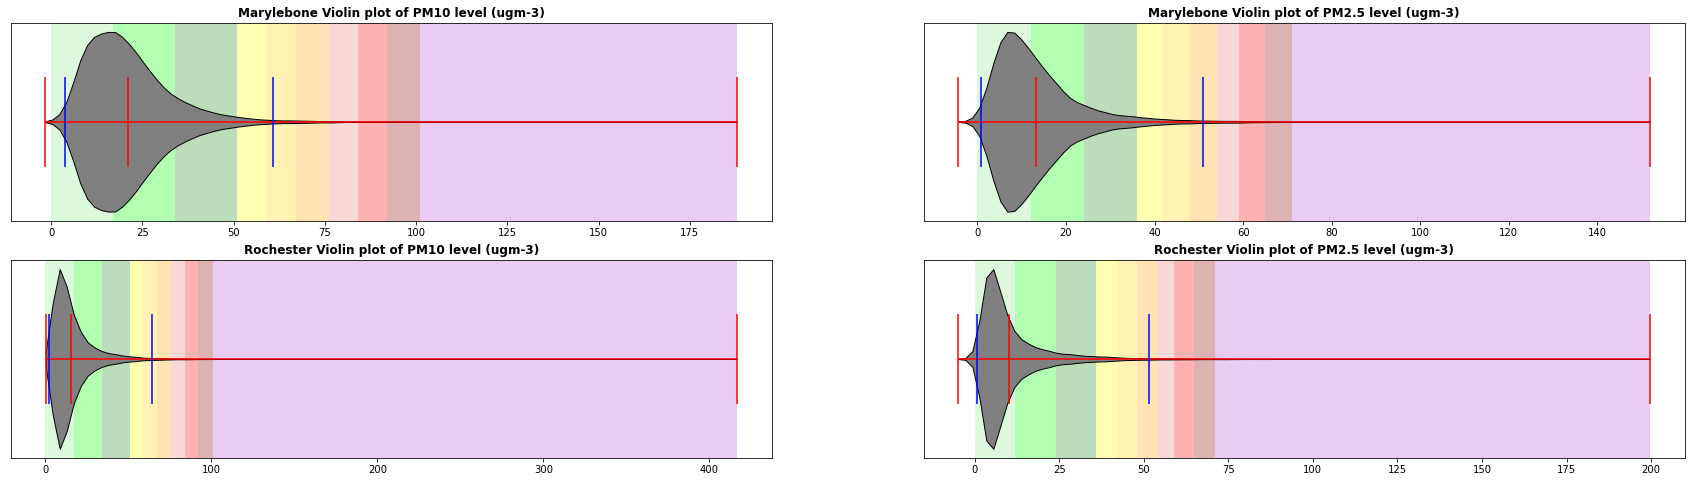

In [4]:
fig4, ax_arr4 = plt.subplots(nrows=2, ncols=2, figsize = (30,8))

j=0 # j and k are variables used to iterate across the axis array
for site in [marylebone,rochester]: 
    k=0

    for pollution in ["PM10",  "PM2.5"]: 

        axis = ax_arr4[j][k]
        data = get_data(site)[pollution].dropna() # Reading in the data and dropping na valsues which the voilin plot doesn't support
        violin = axis.violinplot([data], vert=False, quantiles=[0.01,0.99], showmeans=True) # Plotting the data with a mean and 1% and 99% quantiles

        # Formatting the violin plot as desired
        plt.setp(violin['bodies'], facecolor='grey', edgecolor='black', alpha=None)
        for partname in ('cbars','cmins','cmaxes','cmeans'):
            violin[partname].set_edgecolor('red')
        violin['cquantiles'].set_edgecolor('blue')
        axis.get_yaxis().set_visible(False)
        axis.set_title(re.split(r'[_/]+', site)[2] +' Violin plot of '+ pollution + ' level (ugm-3)', weight='bold')

        # Setting the colour coded background that relates to the index below (taken from the DEFRA website)
        xmax = np.max(data)
        colours = ["lightgreen", "lime", "forestgreen", "yellow", "gold", "orange", "lightcoral", "red", "darkred", "mediumorchid"]

        if pollution == "PM2.5":
            locations =[0, 12, 24, 36, 42, 48, 54, 59, 65, 71, xmax]

        else:
            locations =[0, 17, 34, 51, 59, 67, 76, 84, 92, 101, xmax]

        for i in range(len(locations)-1):
            axis.axvspan(locations[i],locations[i+1], facecolor=colours[i], alpha=0.3, zorder=0)
            

        k += 1
    j += 1

Below is the index for the colour coded background of the plots above

![](images/Pm10index.png)
![](images/Pm2.5index.png)

The plots have red lines showing the min, mean and max of the data, the blue lines represent 1% and 99% quantlies, as you can see 98% of the data  is within low to moderate levels of pollution across all 4 plots


## Section 3

In [5]:
# A function to plot and format the pollution data for each site over various time periods
def plot(kind, site, pollution, period,axis):

    # Calling the data reading function to access the data
    data = get_data(site)

    # A subsection to plot the averages of the data over the entire 3 year period available
    if kind == "average":

        # This uses the pandas group fucntion to group data over a specific period, calculate the mean and plot it vs the time period as a line graph
        data.groupby([period]).mean()[pollution].plot(x=data[period], grid=True, marker=".", linestyle='-', ax=axis, label=re.split(r'[_/]+', site)[2]) 
        axis.set_ylim(bottom=0, top =30)

        # Formatting the graphs apporpriately for each of the possible time periods
        if period == "Day":
            axis.set_xticklabels(["","Mon","Tue","Wed","Thu","Fri", "Sat","Sun"])
            titlep = "Week"

        elif period == "Hour":
            axis.set_xticks([i*2 for i in range(12)])
            axis.set_xticklabels([f"{i*2}:00" for i in range(12)], rotation=90, size =9)
            titlep = "Day"
            axis.set_xlabel("24H Time", weight="bold")

        elif period == "Month":
            titlep="Year"
            axis.set_xticks([i for i in range(13)])
            axis.set_xticklabels(["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=90, size =9)
        
        # Setting some universal graph properties and adding a legend
        axis.set_title(f"Avererage {pollution} pollution Over the {titlep}", weight="bold")
        axis.set_ylabel(f"{pollution} level ($\mu g/m^3$)", weight="bold")
        axis.legend()

    # A subsection to plot a rolling average over the entire dataset 
    elif kind == "rolling":
        
        hours = {"Hour":1, "Day":24, "Week":24*7, "Month":24*30, "Year":24*365} # A dictionary to convert string periods into an integer
        data.PM10.rolling(hours[period], min_periods=1).mean().plot(grid=True) # Plotting the rolling average data


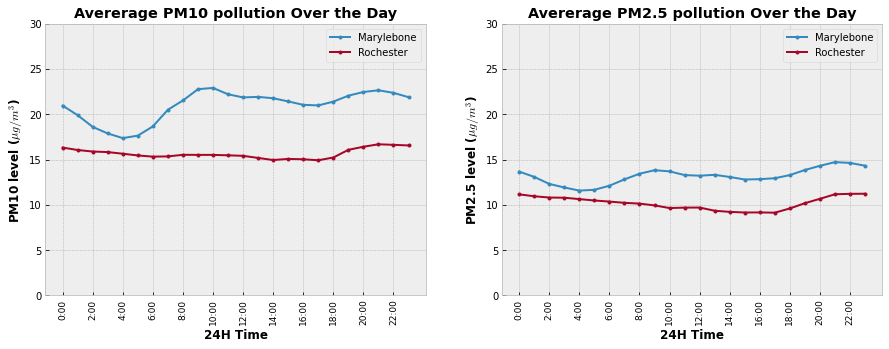

In [6]:
# This is a line graph of the data across the full range averaged over the course of the day for both sites

plt.style.use('bmh')
fig1, ax_arr1 = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

plot("average",marylebone, "PM10", "Hour",ax_arr1[0])
plot("average",rochester, "PM10", "Hour", ax_arr1[0])

plot("average",marylebone, "PM2.5", "Hour",ax_arr1[1])
plot("average",rochester, "PM2.5", "Hour", ax_arr1[1])



<ipython-input-5-764a92eed34b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(["","Mon","Tue","Wed","Thu","Fri", "Sat","Sun"])
<ipython-input-5-764a92eed34b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(["","Mon","Tue","Wed","Thu","Fri", "Sat","Sun"])
<ipython-input-5-764a92eed34b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(["","Mon","Tue","Wed","Thu","Fri", "Sat","Sun"])
<ipython-input-5-764a92eed34b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(["","Mon","Tue","Wed","Thu","Fri", "Sat","Sun"])


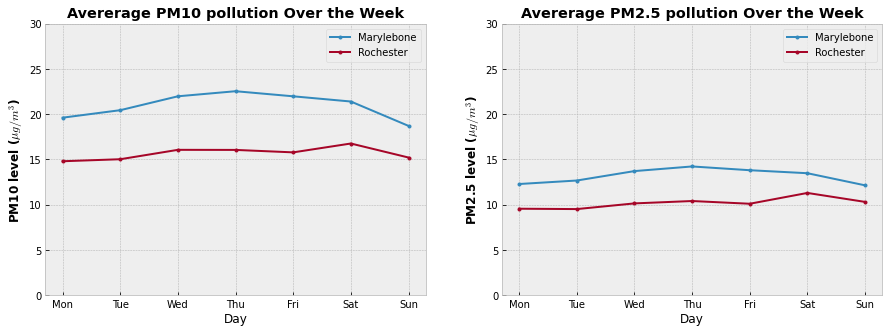

In [7]:
# This is a line graph of the data across the full range averaged over the course of the week for both sites

fig2, ax_arr2 = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

plot("average",marylebone, "PM10", "Day", ax_arr2[0])
plot("average",rochester, "PM10", "Day", ax_arr2[0])

plot("average",marylebone, "PM2.5", "Day", ax_arr2[1])
plot("average",rochester, "PM2.5", "Day", ax_arr2[1])




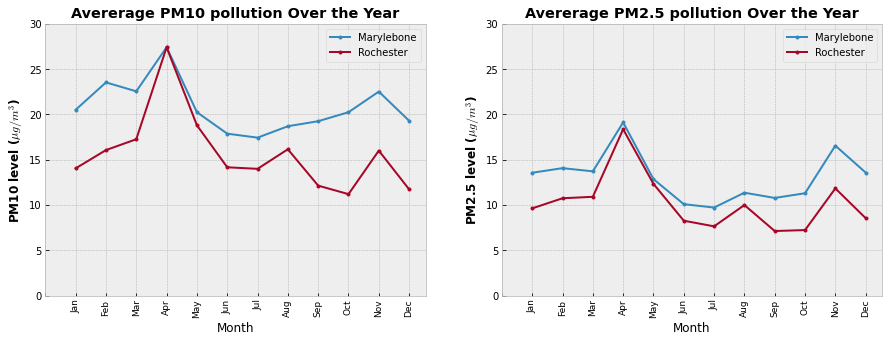

In [8]:
# This is a line graph of the data across the full range averaged over the course of the year for both sites

fig3, ax_arr3 = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

plot("average",marylebone, "PM10", "Month", ax_arr3[0])
plot("average",rochester, "PM10", "Month", ax_arr3[0])

plot("average",marylebone, "PM2.5", "Month", ax_arr3[1])
plot("average",rochester, "PM2.5", "Month", ax_arr3[1])

## Section 4

Below is some code to caluclate correltions between weather conditions and PM2.5 and PM10 pollution, formatting them into a table  

In [9]:
def correlations(axis):

    # Some lists to define the input to the table object
    cell_text = []
    rows = []
    columns = ['Temperature (degrees C)', 'Precipitation (mm)', 'Wind speed (km/h)', 'Pressure (hPa)']

    # Iterating across each site
    for site in [marylebone,rochester]: 
        data = get_data(site)

        # Iterating across pollution type
        for pollution in ["PM10",  "PM2.5"]: 
            rows.append(re.split(r'[_/]+', site)[2] +' '+pollution)
            row=[]

            # Iterating across weather type
            for weather in columns: 

                # Calculating correlations from the data using the Spearman method and appening them to the lists
                row.append(np.around(data[weather].corr(data[pollution], method="spearman"), decimals=3)) 
                
            cell_text.append(row)

    # plotting and formatting the table
    corr_table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc="center")
    axis.axis('off')
    corr_table.set_fontsize(24)
    corr_table.scale(2, 2)
    axis.set_title("Correlation Table of Weather vs Pollution", weight='bold', size=30)

    for i in range(3):
        corr_table[(2+i, 2)].set_facecolor("yellow")


Calling the function and giving it an axis to draw on genereates the table.
(Cells with notably high correlation are highlighted in yellow)

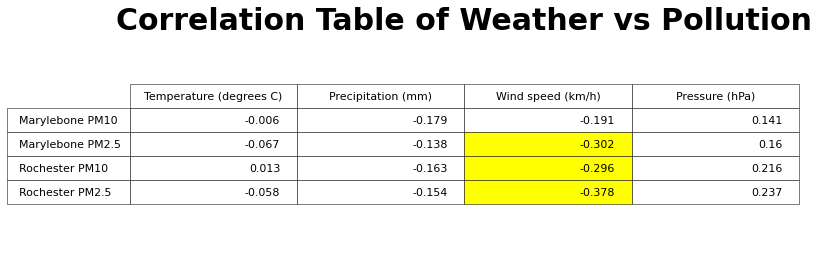

In [10]:
fig5, ax5 =plt.subplots()
correlations(ax5)
